<h1> Smarter dimensionality reduction, followed by tsne and inverse PCA for 'whisk types' </h1>




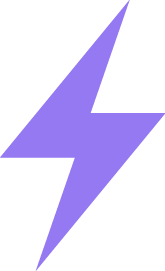

Connected to server at http://localhost:3000


<IPython.core.display.Javascript object>

Session
number: 5c12999a-269b-4b4c-b10c-22405e368cefname: tsne_scatter_line

In [116]:
import numpy as np
# import tables as tb
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
# import sklearn as sk
import seaborn as sns
from sklearn import manifold
from sklearn.decomposition import PCA
import random

from lightning import Lightning
lgn = Lightning(host="http://localhost:3000",ipython=True)
lgn.create_session("tsne_scatter_line")
# lgn = Lightning(local=True,ipython=True)

In [36]:
theta = pd.read_csv('/Users/mathew/work/whiskfree/data/theta_34.csv',header=None)
kappa = pd.read_csv('/Users/mathew/work/whiskfree/data/kappa_34.csv',header=None)
tt = pd.read_csv('/Users/mathew/work/whiskfree/data/trialtype_34.csv',header=None)
ch = pd.read_csv('/Users/mathew/work/whiskfree/data/choice_34.csv',header=None)

In [86]:
decimate?

In [84]:
# reduce sampling frequency with decimate
from scipy.signal import decimate, resample

In [87]:
resample?

In [106]:
theta_d = np.array([[decimate(theta.values.squeeze()[i,900:1890],10)] for i in xrange(0,theta.shape[0])])
theta_r = np.array([[resample(theta.values.squeeze()[i,900:1890],100)] for i in xrange(0,theta.shape[0])])

In [107]:
# plot original and decimated version
# theta_d = theta_d.squeeze()
theta_r = theta_r.squeeze()
theta_r.shape

(389, 100)

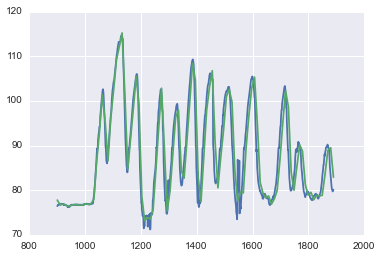

In [97]:
# import mpld3
# %matplotlib inline
# mpld3.enable_notebook()

plt.plot(np.linspace(900,1890,990),theta.values.squeeze()[10,900:1890])
plt.plot(np.linspace(900,1890,99),theta_r[10])
# mpld3.show()

In [104]:
x = np.linspace(900,1890,990)
x.max()

1890.0

In [105]:
theta_r.shape

(389, 99)

In [74]:
x = theta.values.squeeze()[10,900:1890]
x.shape

(990,)

In [81]:
y = decimate(x,10)
y.shape

(99,)

In [89]:
z = resample(x,99)
z.shape

(99,)

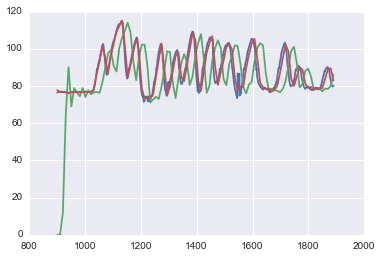

In [90]:
plt.plot(np.linspace(900,1890,990),x)
plt.plot(np.linspace(900,1890,99),y)
plt.plot(np.linspace(900,1890,99),z)

In [121]:
# ch = pd.read_csv('/Users/mathew/work/whiskfree/data/choice_34.csv',header=None)

In [108]:
Xpca_theta = PCA(n_components=30).fit_transform(theta_r)

In [110]:
Xpca_theta.shape

(389, 30)

In [111]:
tsne = manifold.TSNE(n_components=2,learning_rate=500,verbose=1,random_state=0)
mappedX_theta = tsne.fit_transform(Xpca_theta)
# mappedX_kappa = tsne.fit_transform(Xpca_kappa)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 389 / 389
[t-SNE] Mean sigma: 18.791362
[t-SNE] Error after 100 iterations with early exaggeration: 1.048620
[t-SNE] Error after 175 iterations: 1.027971


In [112]:
mappedX_theta.shape

(389, 2)

In [114]:
ch = ch.squeeze()
ch.shape

(389,)

In [120]:
# lgn.scatter(mappedX_theta[:,0],mappedX_theta[:,1],group= ch,size = 3,colormap='Dark2')

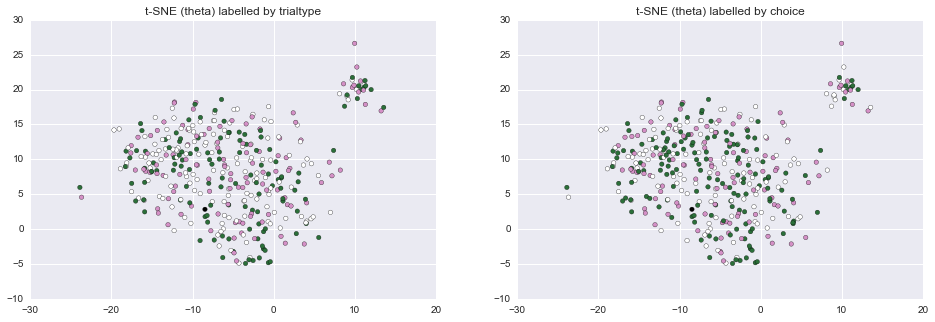

In [123]:
fig, ax = plt.subplots(1,2,figsize = (16,5))
ax[0].scatter(mappedX_theta[:,0],mappedX_theta[:,1],c=tt.values,cmap='cubehelix')
ax[0].set_title('t-SNE (theta) labelled by trialtype')
ax[1].scatter(mappedX_theta[:,0],mappedX_theta[:,1],c=ch.values,cmap='cubehelix')
ax[1].set_title('t-SNE (theta) labelled by choice')
# plt.savefig('theta_34_tsne.png')

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (16,5))
ax[0].scatter(mappedX_kappa[:,0],mappedX_kappa[:,1],c=tt.values,cmap='cubehelix')
ax[0].set_title('t-SNE (kappa) labelled by trialtype')
ax[1].scatter(mappedX_kappa[:,0],mappedX_kappa[:,1],c=ch.values,cmap='cubehelix')
ax[1].set_title('t-SNE (kappa) labelled by choice')
plt.savefig('kappa_34_tsne.png')

In [ ]:
x = theta.values.squeeze()
theta.shape


In [145]:
PCA?

In [181]:
pca_theta = PCA(n_components=0.8)
pca_theta.fit?

In [217]:
theta_reduced = pca_theta.fit(theta_r)
# pca_theta.inverse_transform?
theta_reduced.components_.shape

(13, 100)

In [219]:
np.std(theta_reduced.components_[i])

0.099999968392379096

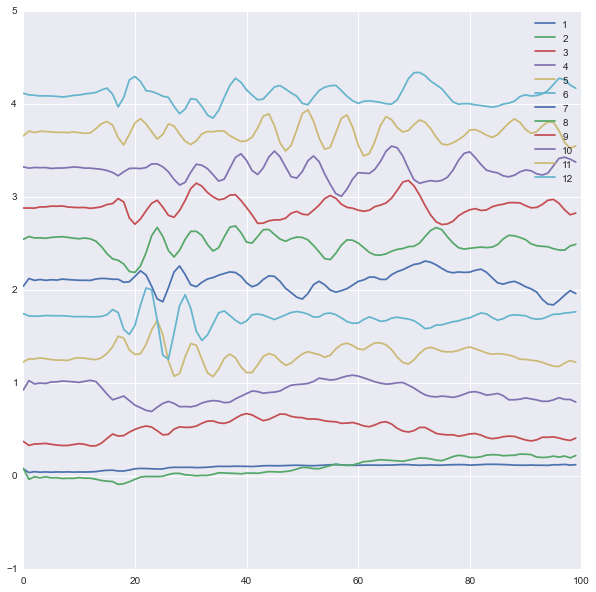

In [228]:
# theta_reduced.
plt.subplots(figsize=(10,10))
offset = 0.0;
for i in xrange(0,12):
    _ =plt.plot(offset + theta_reduced.components_[i])
    offset = offset + 4*np.std(theta_reduced.components_[i])
    
plt.legend(xrange(1,13))

<matplotlib.colorbar.Colorbar instance at 0x1224cef38>

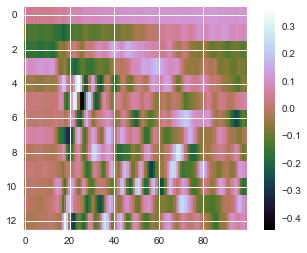

In [214]:
x = theta_reduced.components_
# x.shape
# plt.imshow?
plt.imshow(x,aspect = float(x.shape[1])/x.shape[0],interpolation = 'none',cmap='cubehelix')
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x120264cb0>

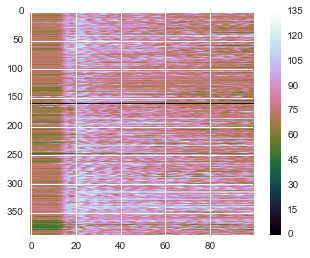

In [215]:
tax = plt.imshow(theta_r,cmap='cubehelix',aspect = float(theta_r.shape[1])/theta_r.shape[0])
plt.colorbar()


In [ ]:
Xpca_kappa.shape

In [ ]:
# dfpc = pd.DataFrame(Xpca_theta[:,0:5])
dfpc = pd.DataFrame(Xpca_kappa[:,0:5])
dfpc['tt'] = tt.values

In [ ]:
dfpc['tt'] = tt.values

In [ ]:
dfpc?

In [ ]:
sns.pairplot(dfpc,hue = 'tt',diag_kind="kde")
# plt.savefig('figs/theta_34_pairplot.png')
plt.savefig('figs/kappa_33_pairplot.png')

In [ ]:
# lgn.line(theta.values.squeeze()[:,499:2499],group= ch.values.squeeze())
fig, ax = plt.subplots(1,3,figsize = (15,10))
for i in range(1,4):
    c = ch.values.squeeze()==i
    
#     ax[i-1].plot(theta.values.squeeze()[c,499:2499].T,color = 'black',alpha = 0.01)
    ax[i-1].plot(kappa.values.squeeze()[c,499:2499].T,color = 'black',alpha = 0.01)

#     tt1 = theta.values.squeeze()[c,499:2499]
#     ax[i-1].imshow(tt1,cmap='cubehelix',aspect = float(tt1.shape[1])/tt1.shape[0])
    
# plt.savefig('figs/theta_34_transparent.png')
plt.savefig('figs/kappa_34_transparent.png')

In [ ]:
cmap = sns.color_palette('cubehelix',4)

In [ ]:
c = ch.values.squeeze()==0

In [ ]:
c = ch.values.squeeze()==3
tt1 = theta.values.squeeze()[c,499:2499]
tt1.shape[0]

In [ ]:
float(tt1.shape[0]) /tt1.shape[1]

In [ ]:
iris = sns.load_dataset('iris')

In [ ]:
plt.plot?

In [ ]:
lgn.line(tt1,color=[0,0,0],"alpha" = 0.01)

In [ ]:
lgn.scatter?

<h3> MPLD3 linked plot attempt </h3>

In [ ]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import mpld3
from mpld3 import plugins, utils



class LinkedView(plugins.PluginBase):
    """A simple plugin showing how multiple axes can be linked"""

    JAVASCRIPT = """
    mpld3.register_plugin("linkedview", LinkedViewPlugin);
    LinkedViewPlugin.prototype = Object.create(mpld3.Plugin.prototype);
    LinkedViewPlugin.prototype.constructor = LinkedViewPlugin;
    LinkedViewPlugin.prototype.requiredProps = ["idpts", "idline", "data"];
    LinkedViewPlugin.prototype.defaultProps = {}
    function LinkedViewPlugin(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    LinkedViewPlugin.prototype.draw = function(){
      var pts = mpld3.get_element(this.props.idpts);
      var line = mpld3.get_element(this.props.idline);
      var data = this.props.data;

      function mouseover(d, i){
        line.data = data[i];
        line.elements().transition()
            .attr("d", line.datafunc(line.data))
            .style("stroke", this.style.fill);
      }
      pts.elements().on("mouseover", mouseover);
    };
    """

    def __init__(self, points, line, linedata):
        if isinstance(points, matplotlib.lines.Line2D):
            suffix = "pts"
        else:
            suffix = None

        self.dict_ = {"type": "linkedview",
                      "idpts": utils.get_id(points, suffix),
                      "idline": utils.get_id(line),
                      "data": linedata}

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (10,6))

# scatter periods and amplitudes
# P = 0.2 + np.random.random(size=20)
# A = np.random.random(size=20)
# data = np.array([[x, Ai * np.sin(x / Pi)]
#                  for (Ai, Pi) in zip(A, P)])
# points = ax[1].scatter(P, A, c=P + A,
#                        s=200, alpha=0.5)
# points = ax[1].scatter(P, A, c=P + A,s=200, alpha=0.5)


subset = random.sample(kappa.index, 100)
x = np.linspace(500, 2499, 2000)
data = np.array([[x,kappa.values.squeeze()[si,499:2499]] for si in subset]) # data needs to be N by 2 x time (for x and y axes)

points = ax[1].scatter(mappedX_kappa[subset,0],mappedX_kappa[subset,1],s = 50,c=tt.values[subset],cmap='cubehelix',alpha=0.5)
ax[1].set_xlabel('t-sne dim 1')
ax[1].set_ylabel('t-sne dim 2')

# create the line object
lines = ax[0].plot(x, 0 * x, '-w', lw=3, alpha=0.5)
# ax[0].set_ylim(-6e-3, 6e-3)

ax[0].set_title("Hover over points to see lines")

# transpose line data and add plugin
linedata = data.transpose(0, 2, 1).tolist()
# linedata = data.tolist()
plugins.connect(fig, LinkedView(points, lines[0], linedata))


In [ ]:
import random
r = random.sample(kappa.index, 10)

In [ ]:
subset = random.sample(kappa.index, 100)
x = np.linspace(500, 2499, 2000)
data = np.array([[x,theta.values.squeeze()[si,499:2499]] for si in subset]) # data needs to be N by 2 x time (for x and y axes)
data.shape

In [ ]:
kappa.shape

In [ ]:
x = np.linspace(0, 10, 100)
P.shape

In [ ]:
data_ = np.array([[x, Ai * np.sin(x / Pi)]
                 for (Ai, Pi) in zip(A, P)])

# data[0]
data_.shape

In [ ]:
# plt.plot(data.transpose(0, 2, 1)[1])
plt.plot(data[3,0],data[3,1])

In [ ]:

linedata = data.transpose(0, 2, 1)#.tolist()
linedata.shape

In [ ]:
mappedX_kappa[subset,0].shape

In [ ]:
x = np.linspace(500, 2499, 2000)

data = kappa.values.squeeze()[subset,499:2499]
data.shape

In [ ]:
x = np.linspace(500, 2499, 2000)
x.shape

In [ ]:
data = np.array([[x,kappa.values.squeeze()[si,499:2499]] for si in subset])

In [ ]:
# subset
# zip(A,P)
data.shape

In [ ]:
fig, ax = plt.subplots(2)

# scatter periods and amplitudes
np.random.seed(0)
P = np.random.random(size=10)
A = np.random.random(size=10)
x = np.linspace(0, 10, 100)
data = np.array([[x, Ai * np.sin(x / Pi)]
                 for (Ai, Pi) in zip(A, P)])
points = ax[1].scatter(P, A, c=P + A,
                       s=200, alpha=0.5)
ax[1].set_xlabel('Period')
ax[1].set_ylabel('Amplitude')

# create the line object
lines = ax[0].plot(x, 0 * x, '-w', lw=3, alpha=0.5)
ax[0].set_ylim(-1, 1)

# transpose line data and add plugin
linedata = data.transpose(0, 2, 1).tolist()
fig.plugins = [LinkedView(points, lines[0], linedata)]

